In [1]:
import pickle
import numpy as np
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity

### Span Embs from Constituency Parser

NPs:
```
[('Donald John Trump', 0, 2, 0), ('the 45th and current president of the United States', 4, 12, 0), ('he', 4, 4, 1), ('a businessman and television personality', 6, 10, 1), ('politics', 2, 2, 1), ('Trump', 0, 0, 2), ("a bachelor 's degree in economics", 16, 21, 2), ('the Wharton School at the University of Pennsylvania', 23, 30, 2), ('the New York City borough of Queens', 6, 12, 2)]
```

Cosine Sim Matrix:
```
[[1.0000002  0.09817498 0.6203058  0.12893382 0.16561681 0.78138417
  0.19852626 0.16931625 0.11798018]
 [0.09817498 1.         0.07451285 0.8118367  0.5822255  0.149193
  0.14794938 0.7134426  0.5789315 ]
 [0.6203058  0.07451285 0.99999976 0.06235351 0.09319022 0.60304755
  0.20396888 0.07529241 0.02914763]
 [0.12893382 0.8118367  0.06235351 0.99999964 0.5536392  0.15186399
  0.18852518 0.66834736 0.5552049 ]
 [0.16561681 0.5822255  0.09319022 0.5536392  1.0000001  0.2327128
  0.12270416 0.58618987 0.5452056 ]
 [0.78138417 0.149193   0.60304755 0.15186399 0.2327128  1.0000001
  0.203094   0.19248912 0.15446916]
 [0.19852626 0.14794938 0.20396888 0.18852518 0.12270416 0.203094
  0.9999998  0.091153   0.12100494]
 [0.16931625 0.7134426  0.07529241 0.66834736 0.58618987 0.19248912
  0.091153   0.9999999  0.6873733 ]
 [0.11798018 0.5789315  0.02914763 0.5552049  0.5452056  0.15446916
  0.12100494 0.6873733  1.0000001 ]]
```

### Span Embs from SpanBERT (avg of mention tokens)

Cosine Sim Matrix:

```
[[1.         0.69345164 0.47318608 0.57206255 0.40644577 0.608278
  0.48579645 0.48592168 0.5309517 ]
 [0.69345164 0.99999976 0.54539984 0.6302986  0.46813974 0.47356266
  0.45545667 0.64269316 0.65307766]
 [0.47318608 0.54539984 0.99999976 0.62554693 0.54881203 0.45703164
  0.3466074  0.44321215 0.4691072 ]
 [0.57206255 0.6302986  0.62554693 1.0000002  0.4310227  0.5480157
  0.4644677  0.5122645  0.620638  ]
 [0.40644577 0.46813974 0.54881203 0.4310227  1.         0.40841937
  0.29394412 0.39052954 0.4167095 ]
 [0.608278   0.47356266 0.45703164 0.5480157  0.40841937 1.0000004
  0.36242932 0.40511602 0.4694442 ]
 [0.48579645 0.45545667 0.3466074  0.4644677  0.29394412 0.36242932
  1.0000002  0.6318076  0.52184594]
 [0.48592168 0.64269316 0.44321215 0.5122645  0.39052954 0.40511602
  0.6318076  0.9999999  0.6480278 ]
 [0.5309517  0.65307766 0.4691072  0.620638   0.4167095  0.4694442
  0.52184594 0.6480278  0.99999964]]
```


### Span Embs from SpanBERT (left boundary; right boundary; avg of mention tokens)

Cosine Sim Matrix:
```
[[0.9999997  0.4505673  0.42960158 0.44663304 0.3817457  0.5172789
  0.40891963 0.40446675 0.374787  ]
 [0.4505673  1.0000004  0.4027764  0.47782835 0.40249056 0.39574638
  0.34640452 0.48036942 0.4611624 ]
 [0.42960158 0.4027764  1.         0.53629225 0.5512566  0.45693475
  0.3018478  0.3535649  0.35967234]
 [0.44663304 0.47782835 0.53629225 1.         0.4062468  0.50464165
  0.3702277  0.40686926 0.4186623 ]
 [0.3817457  0.40249056 0.5512566  0.4062468  1.         0.39857936
  0.29196817 0.39008105 0.36735478]
 [0.5172789  0.39574638 0.45693475 0.50464165 0.39857936 1.0000001
  0.34363115 0.37235138 0.36755043]
 [0.40891963 0.34640452 0.3018478  0.3702277  0.29196817 0.34363115
  0.99999994 0.49493232 0.3891467 ]
 [0.40446675 0.48036942 0.3535649  0.40686926 0.39008105 0.37235138
  0.49493232 0.99999976 0.47374588]
 [0.374787   0.4611624  0.35967234 0.4186623  0.36735478 0.36755043
  0.3891467  0.47374588 0.99999994]]
```


### Span Embs from SpanBERT ( avg(left boundary, right boundary); avg of mention tokens)
```
[[0.9999999  0.78553593 0.49685925 0.60201275 0.4568825  0.6052872
  0.48760933 0.56801736 0.5540475 ]
 [0.78553593 1.0000002  0.5279641  0.6078579  0.5050146  0.50603443
  0.45541915 0.6042533  0.59561825]
 [0.49685925 0.5279641  0.9999999  0.7133685  0.6513749  0.49298194
  0.36177817 0.43495357 0.47713616]
 [0.60201275 0.6078579  0.7133685  0.99999976 0.51548105 0.67643064
  0.45448348 0.5146644  0.558808  ]
 [0.4568825  0.5050146  0.6513749  0.51548105 1.0000001  0.4536459
  0.3588137  0.42628616 0.44339222]
 [0.6052872  0.50603443 0.49298194 0.67643064 0.4536459  1.
  0.39203134 0.45618507 0.472967  ]
 [0.48760933 0.45541915 0.36177817 0.45448348 0.3588137  0.39203134
  1.0000002  0.7353668  0.5330187 ]
 [0.56801736 0.6042533  0.43495357 0.5146644  0.42628616 0.45618507
  0.7353668  0.9999999  0.60689217]
 [0.5540475  0.59561825 0.47713616 0.558808   0.44339222 0.472967
  0.5330187  0.60689217 1.0000001 ]]
```

### Span Embs from SpanBERT ( maxpool of mention tokens)
```
[[0.99999976 0.7440175  0.37543482 0.68170875 0.31919357 0.4856503
  0.6675155  0.66091454 0.6716143 ]
 [0.7440175  1.         0.3151668  0.787387   0.2759755  0.27907324
  0.7559054  0.8216739  0.8318469 ]
 [0.37543482 0.3151668  0.99999976 0.42365265 0.54881203 0.45703164
  0.23931795 0.30216914 0.25781867]
 [0.68170875 0.787387   0.42365265 0.9999999  0.2915104  0.38183594
  0.7205527  0.71621054 0.77837497]
 [0.31919357 0.2759755  0.54881203 0.2915104  1.         0.40841937
  0.20283714 0.27645612 0.23579708]
 [0.4856503  0.27907324 0.45703164 0.38183594 0.40841937 1.0000004
  0.25030425 0.28870478 0.2771489 ]
 [0.6675155  0.7559054  0.23931795 0.7205527  0.20283714 0.25030425
  0.99999976 0.79407066 0.7706468 ]
 [0.66091454 0.8216739  0.30216914 0.71621054 0.27645612 0.28870478
  0.79407066 1.0000002  0.80637354]
 [0.6716143  0.8318469  0.25781867 0.77837497 0.23579708 0.2771489
  0.7706468  0.80637354 0.99999976]]
```

In [22]:
all_NPs = pickle.load(open('data/example3.NPs.pkl', 'rb'))
all_span_embs = np.load('data/example3.span_embs.npy')
print(all_NPs)
print(all_span_embs.shape)
cosine_matrix = cosine_similarity(all_span_embs)
print(cosine_matrix)

[('Milo Yiannopoulos', 3, 4, 0), ('Saturday', 1, 1, 0), ('a mystery man', 6, 8, 0), ('the Four Seasons Resort Hualalai on the big island of Hawaii', 10, 20, 0), ('Yiannopoulos ’ Instagram page', 21, 24, 1), ('details on the ceremony and on the lucky man , with whom Yiannopoulos tied the knot ,', 1, 17, 1), ('few wedding photos', 28, 30, 1), ('Carefully edited snaps', 0, 2, 2), ('the back of his white tuxedo jacket', 25, 31, 2), ('Yiannopoulos , 32 , and his groom', 4, 10, 2), ('vows', 12, 12, 2), ('love', 36, 36, 2), ('the camera', 21, 22, 2), ('Other snaps', 0, 1, 3), ('the couple', 3, 4, 3), ('champagne', 6, 6, 3), ('the groom ’ s face', 9, 13, 3), ('the image', 18, 19, 3), ('Another photo', 0, 1, 4), ('name cards helping to identify the second groom as “ John', 3, 13, 4), ('Yiannopoulos', 0, 0, 5), ('his controversial alt-right remarks', 5, 8, 5), ('This summer', 0, 1, 6), ('he', 3, 3, 6), ('a bitter $ 10 million lawsuit against Simon & Schuster claiming the company backed out of pu

In [17]:
print(all_NPs[0], all_NPs[-6])
print(cosine_matrix[0][-6])

('Milo Yiannopoulos', 3, 4, 0) ('he', 3, 3, 6)
0.9002459


In [23]:
G = nx.Graph()
for i in range(len(all_NPs)):
    for j in range(i+1, len(all_NPs)):
        G.add_edge(all_NPs[i][0][:15], all_NPs[j][0][:15], weight=cosine_matrix[i][j])

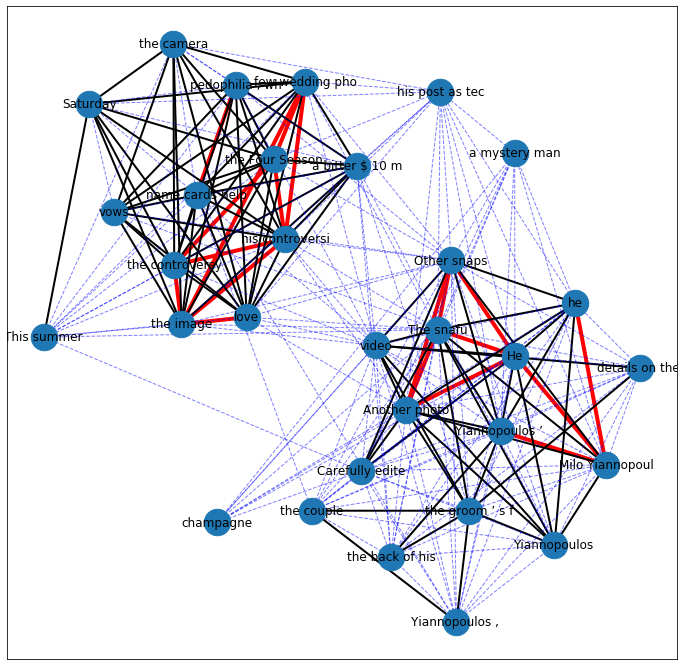

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
#nx.draw(G, with_labels=True)

plt.figure(1,figsize=(12,12)) 

emost = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.75]
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if 0.5 < d['weight'] <= 0.75]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if 0.2 < d['weight'] <= 0.5]


"""
emost = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.8]
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if 0.6 < d['weight'] <= 0.8]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if 0.4 < d['weight'] <= 0.6]
"""

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=emost,
                       width=4, edge_color='r')
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=2)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=1, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos)

plt.show()

Donald John Trump is the 45th and current president of the United States. 
Before entering politics, he was a businessman and television personality. 
Trump was born and raised in the New York City borough of Queens, and received a bachelor's degree in economics from the Wharton School at the University of Pennsylvania.

`[('Donald John Trump', 0, 2, 0), 
  ('the 45th and current president of the United States', 4, 12, 0), 
  ('he', 4, 4, 1), ('a businessman and television personality', 6, 10, 1), 
  ('politics', 2, 2, 1), ('Trump', 0, 0, 2), 
  ("a bachelor 's degree in economics", 16, 21, 2), 
  ('the Wharton School at the University of Pennsylvania', 23, 30, 2), 
  ('the New York City borough of Queens', 6, 12, 2)]`

In [25]:
G = nx.Graph()
for i in range(len(all_NPs)):
    for j in range(i+1, len(all_NPs)):
        G.add_edge(all_NPs[i][0], all_NPs[j][0], weight=cosine_matrix[i][j])
pr = nx.pagerank(G, alpha=0.85)
print(pr)

{'Milo Yiannopoulos': 0.032658690904411, 'Saturday': 0.02649351332632068, 'a mystery man': 0.021944677778347067, 'the Four Seasons Resort Hualalai on the big island of Hawaii': 0.03724842758490384, 'Yiannopoulos ’ Instagram page': 0.03529191646328859, 'details on the ceremony and on the lucky man , with whom Yiannopoulos tied the knot ,': 0.023509788764839997, 'few wedding photos': 0.037576922038794126, 'Carefully edited snaps': 0.030442377549940444, 'the back of his white tuxedo jacket': 0.03069531325361408, 'Yiannopoulos , 32 , and his groom': 0.025540394635764515, 'vows': 0.030826106585156964, 'love': 0.03645298327938961, 'the camera': 0.030143804644354524, 'Other snaps': 0.039927585432754806, 'the couple': 0.030825810963372387, 'champagne': 0.018877262913898844, 'the groom ’ s face': 0.033795710439336296, 'the image': 0.03753565879004356, 'Another photo': 0.04010036599530944, 'name cards helping to identify the second groom as “ John': 0.0336732712233368, 'Yiannopoulos': 0.03143111

In [26]:
print(sorted(pr.items(), key=lambda _:_[1], reverse=True))

[('The snafu', 0.04175804637058153), ('Another photo', 0.04010036599530944), ('Other snaps', 0.039927585432754806), ('his controversial alt-right remarks', 0.03873138966066273), ('few wedding photos', 0.037576922038794126), ('the image', 0.03753565879004356), ('the Four Seasons Resort Hualalai on the big island of Hawaii', 0.03724842758490384), ('He', 0.03710974346136156), ('love', 0.03645298327938961), ('video', 0.03631330642137536), ('the controversy', 0.03613673361941046), ('Yiannopoulos ’ Instagram page', 0.03529191646328859), ('the groom ’ s face', 0.033795710439336296), ('name cards helping to identify the second groom as “ John', 0.0336732712233368), ('he', 0.03353647094545211), ('a bitter $ 10 million lawsuit against Simon & Schuster claiming the company backed out of publishing his book “ Dangerous', 0.03341646856927772), ('pedophilia , which he has since condemned', 0.03315592785471258), ('Milo Yiannopoulos', 0.032658690904411), ('Yiannopoulos', 0.03143111331417561), ('vows',